In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [62]:
train = pd.read_csv('data/titanic/train.csv',  index_col=0)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
survival = [sum(train['Survived'] == 0), sum(train['Survived'] == 1)]
survival

[549, 342]

<BarContainer object of 2 artists>

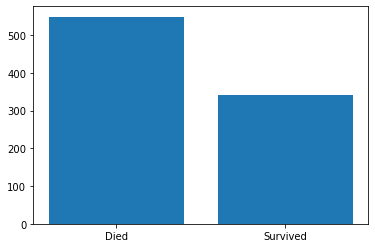

In [5]:
plt.bar(['Died', 'Survived'], survival)

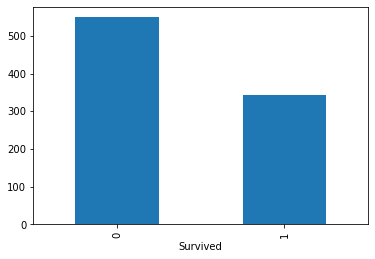

In [6]:
train.groupby('Survived').size().plot.bar()

In [9]:
data = [
    [df_tryDM.shape[0], df_tryDF.shape[0]], 
    [df_trySM.shape[0], df_trySF.shape[0]]
    ]
index = ['male', 'female']
columns = ['Survived', 'Died']

df_try = pd.DataFrame[data, index : index, columns : columns]

NameError: name 'df_tryDM' is not defined

In [11]:
df_tryDM = train.loc[(train['Survived'] == 1) & (train['Sex'] == 'male')]
df_tryDM.shape[0]

109

In [12]:
df_tryDF = train.loc[(train['Survived'] == 1) & (train['Sex'] == 'female')]
df_tryDF.shape[0]

233

In [13]:
df_trySM = train.loc[(train['Survived'] == 0) & (train['Sex'] == 'male')]
df_trySM.shape[0]

468

In [14]:
df_trySF = train.loc[(train['Survived'] == 0) & (train['Sex'] == 'female')]
df_trySF.shape[0]

81

In [16]:
data = [
    [df_tryDM.shape[0], df_tryDF.shape[0]], 
    [df_trySM.shape[0], df_trySF.shape[0]]
    ]
data

[[109, 233], [468, 81]]

In [17]:
index = ['male', 'female']
index

['male', 'female']

In [18]:
columns = ['Survived', 'Died']
columns

['Survived', 'Died']

In [19]:
df_try = pd.DataFrame(data, index = index, columns = columns)
df_try

,Survived,Died
male,109,233
female,468,81


In [20]:
df = pd.DataFrame({columns[0]: [data[0][0],data[1][0]], columns[1]:[data[0][1],data[1][1]]})
df.set_index(pd.Series(index))

,Survived,Died
male,109,233
female,468,81


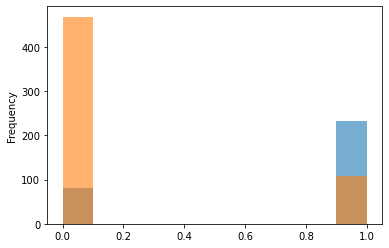

In [21]:
train['Survived'].loc[train['Sex'] == 'female'].plot(kind='hist', alpha=0.6)
train['Survived'].loc[train['Sex'] == 'male'].plot(kind='hist', alpha=0.6)

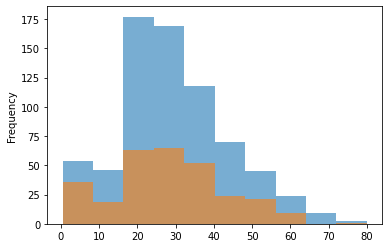

In [25]:
train['Age'].plot(kind='hist', alpha=0.6)
train['Age'].loc[train['Survived'] == 1].plot(kind='hist', alpha=0.6)

In [34]:
train['Age Bin CUT'] = pd.cut(train['Age'], 20)

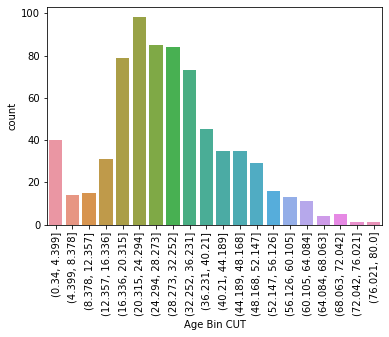

In [37]:
x = sns.countplot(x=train['Age Bin CUT'])
x.set_xticklabels(x.get_xticklabels(), rotation=90)
x = sns.countplot(x=train['Age Bin CUT'])
x.set_xticklabels(x.get_xticklabels(), rotation=90)
None

One plot number of passengers of a certain age and number of survivors of a certain age

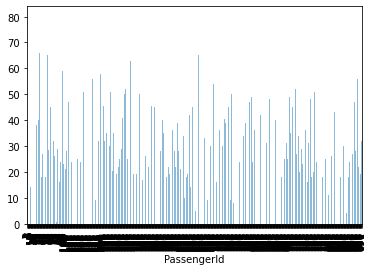

In [45]:
train['Age'].plot(kind = 'bar', alpha = 0.5)

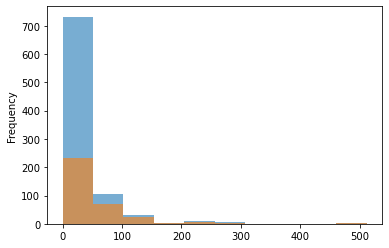

In [41]:
train['Fare'].plot(kind='hist', alpha=0.6)
train['Fare'].loc[train['Survived'] == 1].plot(kind='hist', alpha=0.6)

# Step 3
Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

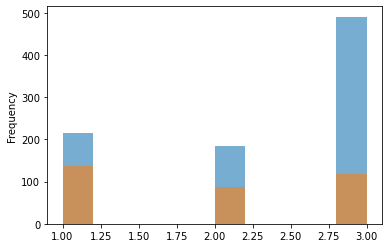

In [43]:
train['Pclass'].plot(kind='hist', alpha=0.6)
train['Pclass'].loc[train['Survived'] == 1].plot(kind='hist', alpha=0.6)

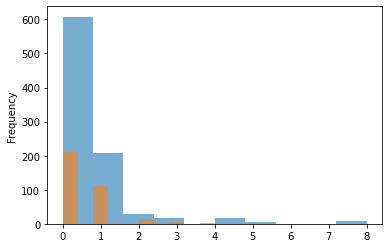

In [46]:
train['SibSp'].plot(kind='hist', alpha=0.6)
train['SibSp'].loc[train['Survived'] == 1].plot(kind='hist', alpha=0.6)

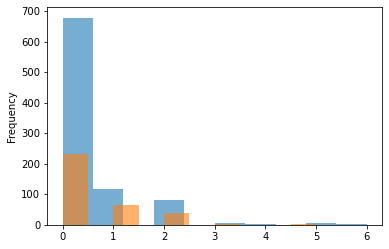

In [47]:
train['Parch'].plot(kind='hist', alpha=0.6)
train['Parch'].loc[train['Survived'] == 1].plot(kind='hist', alpha=0.6)

In [88]:
SS = sum((train['Embarked'] == 'S') & (train['Survived'] == 1))
SD = sum((train['Embarked'] == 'S') & (train['Survived'] == 0))
CS = sum((train['Embarked'] == 'C') & (train['Survived'] == 1))
CD = sum((train['Embarked'] == 'C') & (train['Survived'] == 0))
QS = sum((train['Embarked'] == 'Q') & (train['Survived'] == 1))
QD = sum((train['Embarked'] == 'Q') & (train['Survived'] == 0))
row = ['S', 'C','Q']
col = ['Survived', 'Died']
data_embarked = pd.DataFrame(([SS,SD],[CS,CD], [QS, QD]), index = row, columns = col)
data_embarked

,Survived,Died
S,217,427
C,93,75
Q,30,47


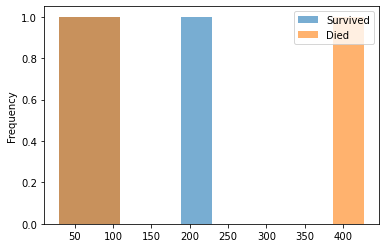

In [89]:
data_embarked.plot(kind='hist', alpha=0.6)

#  Machine Learning

In [38]:
import pandas as pd
import numpy as np

In [149]:
df = pd.read_csv('data/titanic/train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
df['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

#### two classes survived, died

In [112]:
df_binary = df
df_binary.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Logistic Regression

Titanic:

We want to be able to predict whether a passenger of the titanic died or survived given some input data.
Logistic Regression estimates the probability of belonging to class 1 (survived) by fitting a sigmoid function.

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [114]:
df_binary.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In challenge we are told to classify according to 1st, 2nd, 3rd classe. Therefore I suspect, that the class is a good criterion to filter on, to build the model on. 
Other simple idea: sex (male, female)

In [115]:
# Define X
X = df_binary[['Pclass']]
X.head()

,Pclass
0,3
1,1
2,3
3,1
4,3


In [116]:
# Define y
y = df_binary['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [117]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=42)

In [118]:
# Create a model
m = LogisticRegression(random_state=30)

In [119]:
m

LogisticRegression(random_state=30)

In [120]:
# Train/fit the model
m.fit(X_train, y_train)

LogisticRegression(random_state=30)

In [121]:
# Use the model to make predictions on the seen data
m.predict(X_train)

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [122]:
# Inspect the accuracy of the model
print(f'The accuracy of our model is {round(m.score(X_train, y_train), 2)}')
# The model is able (on the training data) to predict survived/died in 67% of the cases

The accuracy of our model is 0.67


In [123]:
# Inspect the probabilities the model assigns
[[round(l[0], 2), round(l[1], 2)] for l in m.predict_proba(X_train)]
#Anja: no clear boundary between the two states

[[0.37, 0.63],
 [0.74, 0.26],
 [0.57, 0.43],
 [0.74, 0.26],
 [0.37, 0.63],
 [0.57, 0.43],
 [0.74, 0.26],
 [0.57, 0.43],
 [0.37, 0.63],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.37, 0.63],
 [0.74, 0.26],
 [0.37, 0.63],
 [0.57, 0.43],
 [0.74, 0.26],
 [0.57, 0.43],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.37, 0.63],
 [0.74, 0.26],
 [0.57, 0.43],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.37, 0.63],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.37, 0.63],
 [0.57, 0.43],
 [0.57, 0.43],
 [0.37, 0.63],
 [0.37, 0.63],
 [0.57, 0.43],
 [0.74, 0.26],
 [0.37, 0.63],
 [0.37, 0.63],
 [0.74, 0.26],
 [0.37, 0.63],
 [0.37, 0.63],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.57, 0.43],
 [0.57, 0.43],
 [0.37, 0.63],
 [0.57, 0.43],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.57, 0.43],
 [0.37, 0.63],
 [0.57, 0.43],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.37, 0.63],
 [0.74, 0.26],
 [0.57, 0.43],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.74, 0.26],
 [0.57, 0.43],
 [0.74, 0.

In [124]:
# Inspect the coefficients and the intercept
w1 = m.coef_[0][0]
w1

-0.8042855681625191

In [125]:
w0 = m.intercept_[0]
w0

1.343215686761826

In [126]:
m.classes_

array([0, 1])

In [127]:
# If time permits visualize what the sigmoid function fits in this case
def sigmoid_function(x):
    '''
    Returns the probability of a penguin belonging to the species Gentoo for a given x. p(y=Gentoo|x)
    
    Parameters
    ----------
    x : The flipper length of the penguin in mm
    '''
    return (1/(1+np.exp(-(w0+w1*x))))

In [128]:
round(sigmoid_function(1), 2) # The probability of a passenger in 1st class belonging to the class survived

0.63

In [129]:
round(sigmoid_function(2), 2) # The probability of a passenger in 2nd class belonging to the class survived

0.43

In [130]:
round(sigmoid_function(3), 2) # The probability of a passenger in 3rd class belonging to the class survived

0.26

In [131]:
X_train.head()

,Pclass
298,1
884,3
247,2
478,3
305,1


In [132]:
# Create a new column that displays the probability of belonging to class survivor
df_binary['survivor'] = round(df['Pclass'].apply(sigmoid_function), 2)
df_binary.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.26
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.63
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.63
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.26


In [133]:
import seaborn as sns

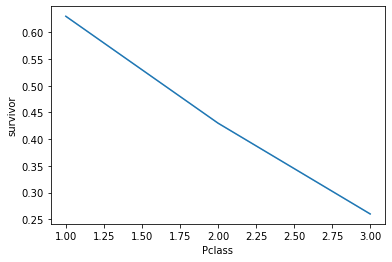

In [134]:
sns.lineplot(x='Pclass', y='survivor', data=df_binary)
#not very interesting, there are only three values 0.63, 0.43, 0.26 to depict 

It is absolutely possible to use more than one input feature

In [161]:
df = pd.read_csv('data/titanic/train.csv', sep=',')
df['Sex'].replace(to_replace =['female', 'male'], value = [0, 1], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [162]:
m1 = LogisticRegression(random_state=44)
X = df_binary2[['Pclass', 'Sex']]
y = df_binary2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [163]:
m1

LogisticRegression(random_state=44)

In [164]:
# Train/fit the model
m1.fit(X_train, y_train)

LogisticRegression(random_state=44)

In [165]:
# Use the model to make predictions on the seen data
m1.predict(X_train)

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [166]:
# Inspect the accuracy of the model
print(f'The accuracy of our model is {round(m1.score(X_train, y_train), 2)}')
# The model is able (on the training data) to predict survived/died in 67% of the cases

The accuracy of our model is 0.79


In [167]:
# Inspect the probabilities the model assigns
[[round(l[0], 2), round(l[1], 2)] for l in m1.predict_proba(X_train)]
#no clear boundary between the two states

[[0.58, 0.42],
 [0.89, 0.11],
 [0.21, 0.79],
 [0.89, 0.11],
 [0.58, 0.42],
 [0.21, 0.79],
 [0.4, 0.6],
 [0.77, 0.23],
 [0.1, 0.9],
 [0.89, 0.11],
 [0.4, 0.6],
 [0.89, 0.11],
 [0.4, 0.6],
 [0.1, 0.9],
 [0.4, 0.6],
 [0.1, 0.9],
 [0.77, 0.23],
 [0.89, 0.11],
 [0.21, 0.79],
 [0.89, 0.11],
 [0.4, 0.6],
 [0.89, 0.11],
 [0.89, 0.11],
 [0.89, 0.11],
 [0.89, 0.11],
 [0.89, 0.11],
 [0.58, 0.42],
 [0.4, 0.6],
 [0.77, 0.23],
 [0.89, 0.11],
 [0.89, 0.11],
 [0.58, 0.42],
 [0.89, 0.11],
 [0.89, 0.11],
 [0.1, 0.9],
 [0.77, 0.23],
 [0.21, 0.79],
 [0.1, 0.9],
 [0.58, 0.42],
 [0.21, 0.79],
 [0.89, 0.11],
 [0.58, 0.42],
 [0.58, 0.42],
 [0.89, 0.11],
 [0.58, 0.42],
 [0.58, 0.42],
 [0.89, 0.11],
 [0.4, 0.6],
 [0.77, 0.23],
 [0.77, 0.23],
 [0.58, 0.42],
 [0.21, 0.79],
 [0.89, 0.11],
 [0.89, 0.11],
 [0.77, 0.23],
 [0.1, 0.9],
 [0.77, 0.23],
 [0.89, 0.11],
 [0.89, 0.11],
 [0.1, 0.9],
 [0.89, 0.11],
 [0.77, 0.23],
 [0.89, 0.11],
 [0.4, 0.6],
 [0.89, 0.11],
 [0.77, 0.23],
 [0.89, 0.11],
 [0.89, 0.11],
 [0.89, 0.

In [168]:
# Inspect the coefficients and the intercept
w1 = m1.coef_[0][0]
w1

-0.8789659410752028

In [169]:
w0 = m1.intercept_[0]
w0

3.057030614471014

In [170]:
m1.classes_

array([0, 1])

In [171]:
round(sigmoid_function(0), 2) # The probability of a female passenger belonging to the class survived

0.96

In [172]:
round(sigmoid_function(1), 2) # The probability of a male passenger belonging to the class survived

0.9

In [173]:
# Create a new column that displays the probability of belonging to class survivor
df['survivor'] = round(df['Sex'].apply(sigmoid_function), 2)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survivor
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.90
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.96
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.96
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.96
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.90


m (Pclass) and m1 (Pclass, Sex) Classification models
Classifier 1:

Accuracy: 0,67

Precision: 

Recall: 

F1-Score: 

Classifier 2:

Accuracy: 0,79

Precision: 

Recall: 

F1-Score: 